In [225]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder


pio.templates.default = "plotly_white"

In [227]:
data = pd.read_csv("C:\\Users\\INV_ESSGHAIER\\Desktop\\supply_chain_data.csv")
print(data.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [229]:
print(data.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

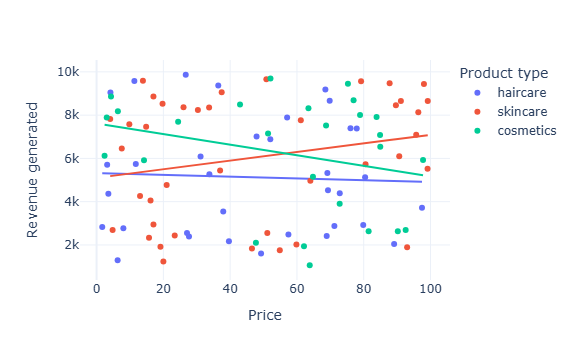

In [231]:
fig = px.scatter(data, x='Price', 
                 y='Revenue generated', 
                 color='Product type', 
                 hover_data=['Number of products sold'], 
                 trendline="ols")
fig.show()

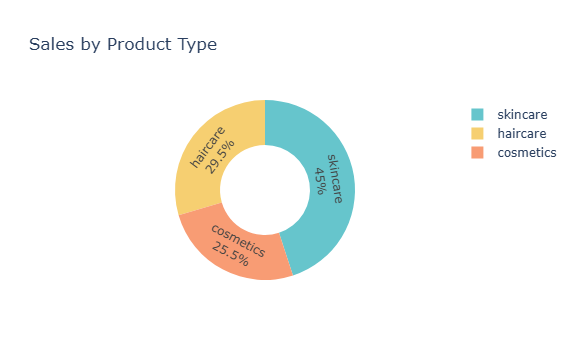

In [233]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type', 
                   title='Sales by Product Type', 
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)
                   
pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

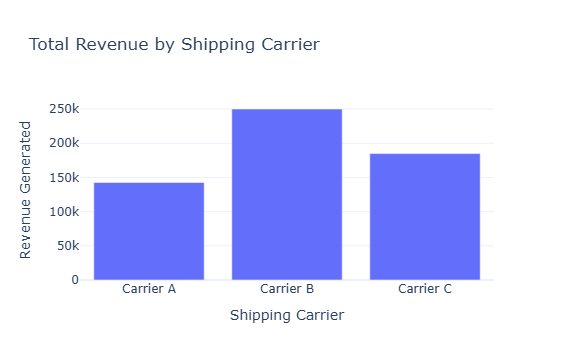

In [234]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'], 
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier', 
                  xaxis_title='Shipping Carrier', 
                  yaxis_title='Revenue Generated')
fig.show()

In [236]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


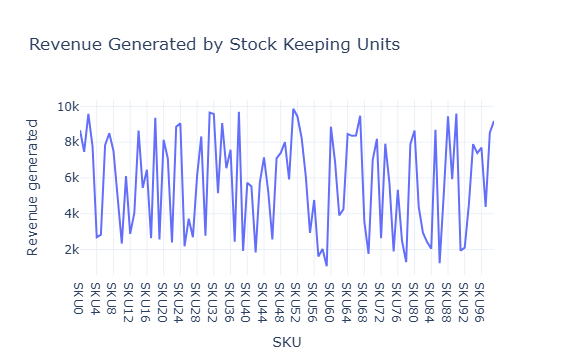

In [239]:
revenue_chart = px.line(data, x='SKU', 
                        y='Revenue generated', 
                        title='Revenue Generated by Stock Keeping Units')
revenue_chart.show()

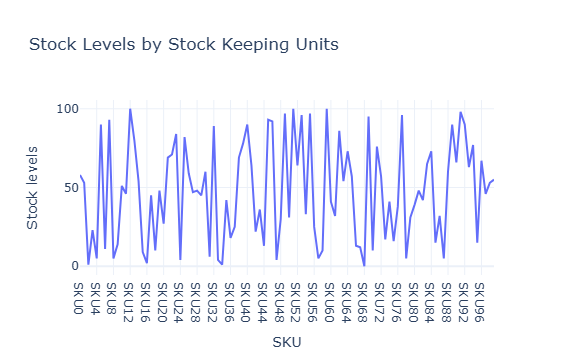

In [240]:
stock_chart = px.line(data, x='SKU', 
                      y='Stock levels', 
                      title='Stock Levels by Stock Keeping Units')
stock_chart.show()

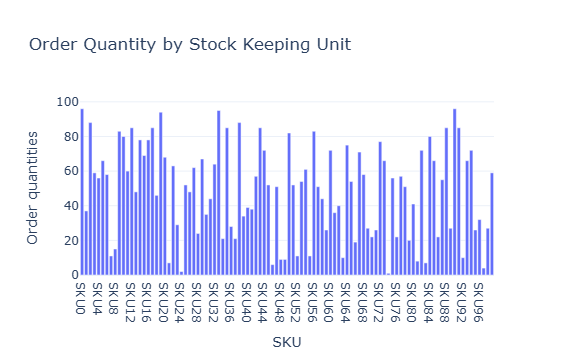

In [243]:
order_quantity_chart = px.bar(data, x='SKU', 
                              y='Order quantities', 
                              title='Order Quantity by Stock Keeping Unit')
order_quantity_chart.show()

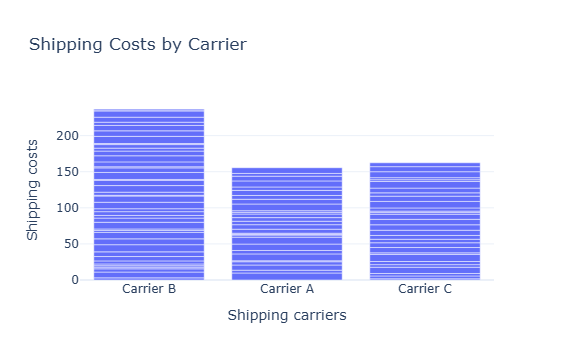

In [245]:
shipping_cost_chart = px.bar(data, x='Shipping carriers', 
                             y='Shipping costs', 
                             title='Shipping Costs by Carrier')
shipping_cost_chart.show()

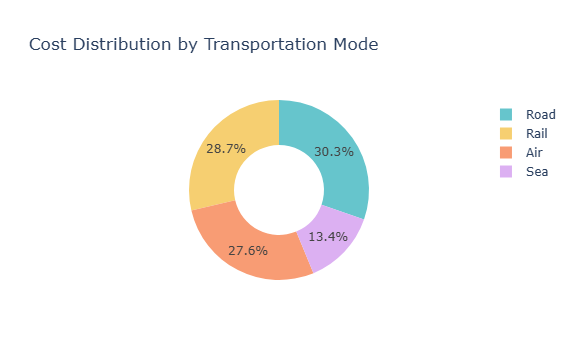

In [247]:
transportation_chart = px.pie(data, 
                              values='Costs', 
                              names='Transportation modes', 
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

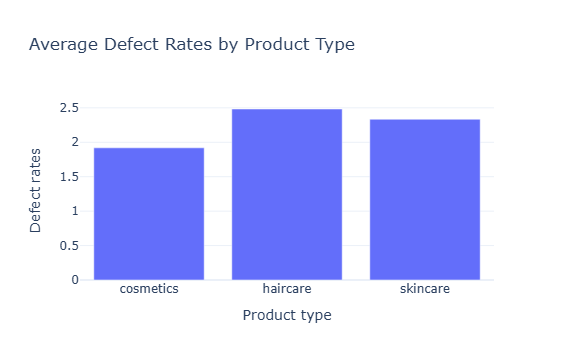

In [249]:
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
             title='Average Defect Rates by Product Type')
fig.show()

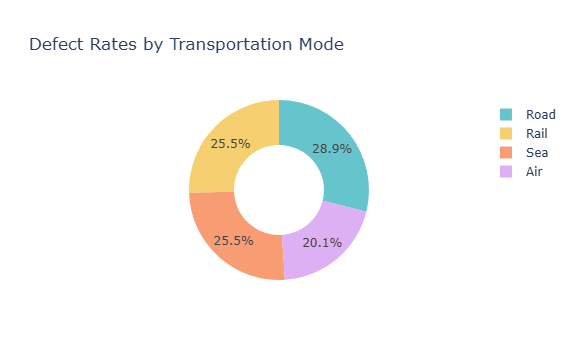

In [251]:
pivot_table = pd.pivot_table(data, values='Defect rates', 
                             index=['Transportation modes'], 
                             aggfunc='mean')

transportation_chart = px.pie(values=pivot_table["Defect rates"], 
                              names=pivot_table.index, 
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

In [253]:
print(data.isnull().sum())


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [255]:
data['Location'] = data['Location'].astype('category').cat.codes


In [257]:
features = ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 
            'Stock levels', 'Order quantities', 'Shipping costs', 'Lead times', 'Location']

In [259]:
data_segment = data[features].dropna()


In [261]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)

In [263]:
inertia = []
for k in range(1, 11):  # Testing cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\INV_ESSGHAIER\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\INV_ESSGHAIER\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\INV_ESSGHAIER\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\INV_ESSGHAIER\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMe

C:\Users\INV_ESSGHAIER\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



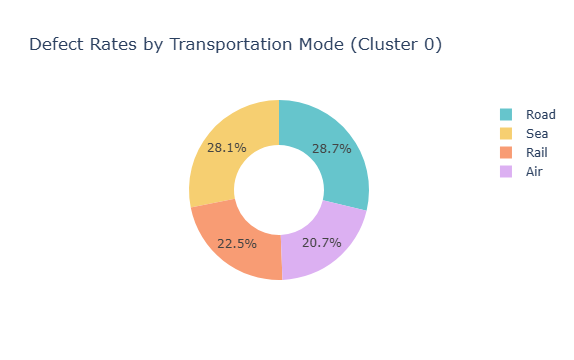

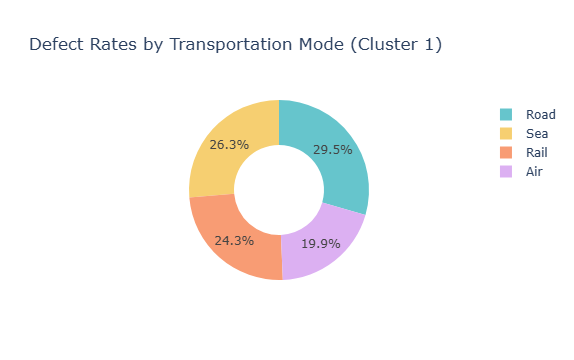

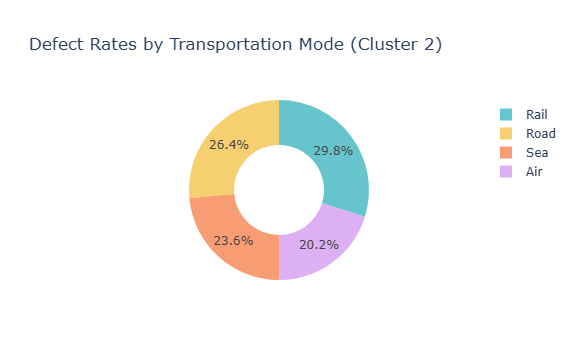

In [265]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def perform_clustering(data, features, k):
    """
    Perform KMeans clustering and plot the defect rates by transportation mode.
    data: pd.DataFrame, the input data
    features: list, the list of columns to be used for clustering
    k: int, the number of clusters
    
    Returns:
    - DataFrame with cluster labels
    """
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[features])
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_data)
    
    # Group data by transportation mode and calculate the average defect rates per cluster
    defect_rates_by_cluster = data.groupby(['Cluster', 'Transportation modes'])['Defect rates'].mean().reset_index()
    
    # Create a pivot table for plotting
    pivot_table = pd.pivot_table(defect_rates_by_cluster, values='Defect rates', 
                                 index=['Transportation modes'], 
                                 columns=['Cluster'], aggfunc='mean', fill_value=0)

    # Create a pie chart using plotly for each cluster
    for cluster in pivot_table.columns:
        # Prepare the data for the pie chart
        cluster_data = pivot_table[cluster].reset_index()
        
        # Make sure the 'Transportation modes' column is properly set for pie chart
        cluster_data.columns = ['Transportation modes', 'Defect rates']
        
        # Plot the pie chart for each cluster
        fig = px.pie(cluster_data, 
                     values='Defect rates',  # Ensure 'Defect rates' is used as values
                     names='Transportation modes',  # Ensure 'Transportation modes' is used for names
                     title=f'Defect Rates by Transportation Mode (Cluster {cluster})',
                     hole=0.5,
                     color_discrete_sequence=px.colors.qualitative.Pastel)
        fig.show()

    return data

# Example usage
features = ['Price', 'Revenue generated', 'Order quantities', 'Stock levels']  # Example features
k = 3  # Example number of clusters
clustered_data = perform_clustering(data, features, k)


In [267]:
features = ['Price', 'Availability', 'Stock levels', 'Lead times', 'Product type']  # Include any other relevant features
target = 'Revenue generated'

In [269]:
X = data[features]
y = data[target]


In [271]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Price', 'Availability', 'Stock levels', 'Lead times']),
        ('cat', OneHotEncoder(), ['Product type'])
    ])

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [277]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price', 'Availability',
                                                   'Stock levels',
                                                   'Lead times']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Product type'])])),
                ('regressor', LinearRegression())])

In [279]:
y_pred = pipeline.predict(X_test)


In [281]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [283]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2511.0440433532412
Mean Squared Error: 8111551.995208196
R-squared: -0.009386071306022092


In [285]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [289]:
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)


In [291]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Random Forest - Mean Absolute Error: 2599.0187110301954
Random Forest - Mean Squared Error: 8469522.947751578
Random Forest - R-squared: -0.05393129442027833


In [295]:
new_pred = pipeline.predict(new_data)
print(f"Predicted Revenue: {new_pred[0]}")

Predicted Revenue: 3823.902469936905
